In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [123]:
df = pd.read_csv('./spaceship-titanic/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [124]:
print(f'Banyak baris: {df.shape[0]}')
print(f'Banyak kolom: {df.shape[1]}')

Banyak baris: 8693
Banyak kolom: 14


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [126]:
df.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [127]:
print(f'Baris Duplikat: {df.duplicated().sum()}')

Baris Duplikat: 0


In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [129]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [130]:
num_cols = df.select_dtypes(include='float').columns
obj_cols = df.select_dtypes(exclude=['float']).columns.difference(['PassengerId', 'Transported'])

In [131]:
for col in obj_cols:
    print(f"{col}")
    print(f"{df[col].dropna().unique()[:20].tolist()}\n\n")

Cabin
['B/0/P', 'F/0/S', 'A/0/S', 'F/1/S', 'F/0/P', 'F/2/S', 'G/0/S', 'F/3/S', 'B/1/P', 'F/1/P', 'G/1/S', 'F/2/P', 'F/3/P', 'F/4/P', 'F/5/P', 'G/0/P', 'F/6/P', 'E/0/S', 'D/0/P', 'C/2/S']


CryoSleep
[False, True]


Destination
['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']


HomePlanet
['Europa', 'Earth', 'Mars']


Name
['Maham Ofracculy', 'Juanna Vines', 'Altark Susent', 'Solam Susent', 'Willy Santantines', 'Sandie Hinetthews', 'Billex Jacostaffey', 'Candra Jacostaffey', 'Andona Beston', 'Erraiam Flatic', 'Altardr Flatic', 'Wezena Flatic', 'Berers Barne', 'Reney Baketton', 'Elle Bertsontry', 'Justie Pooles', 'Flats Eccle', 'Carry Hughriend', 'Alus Upead', 'Lyde Brighttt']


VIP
[False, True]




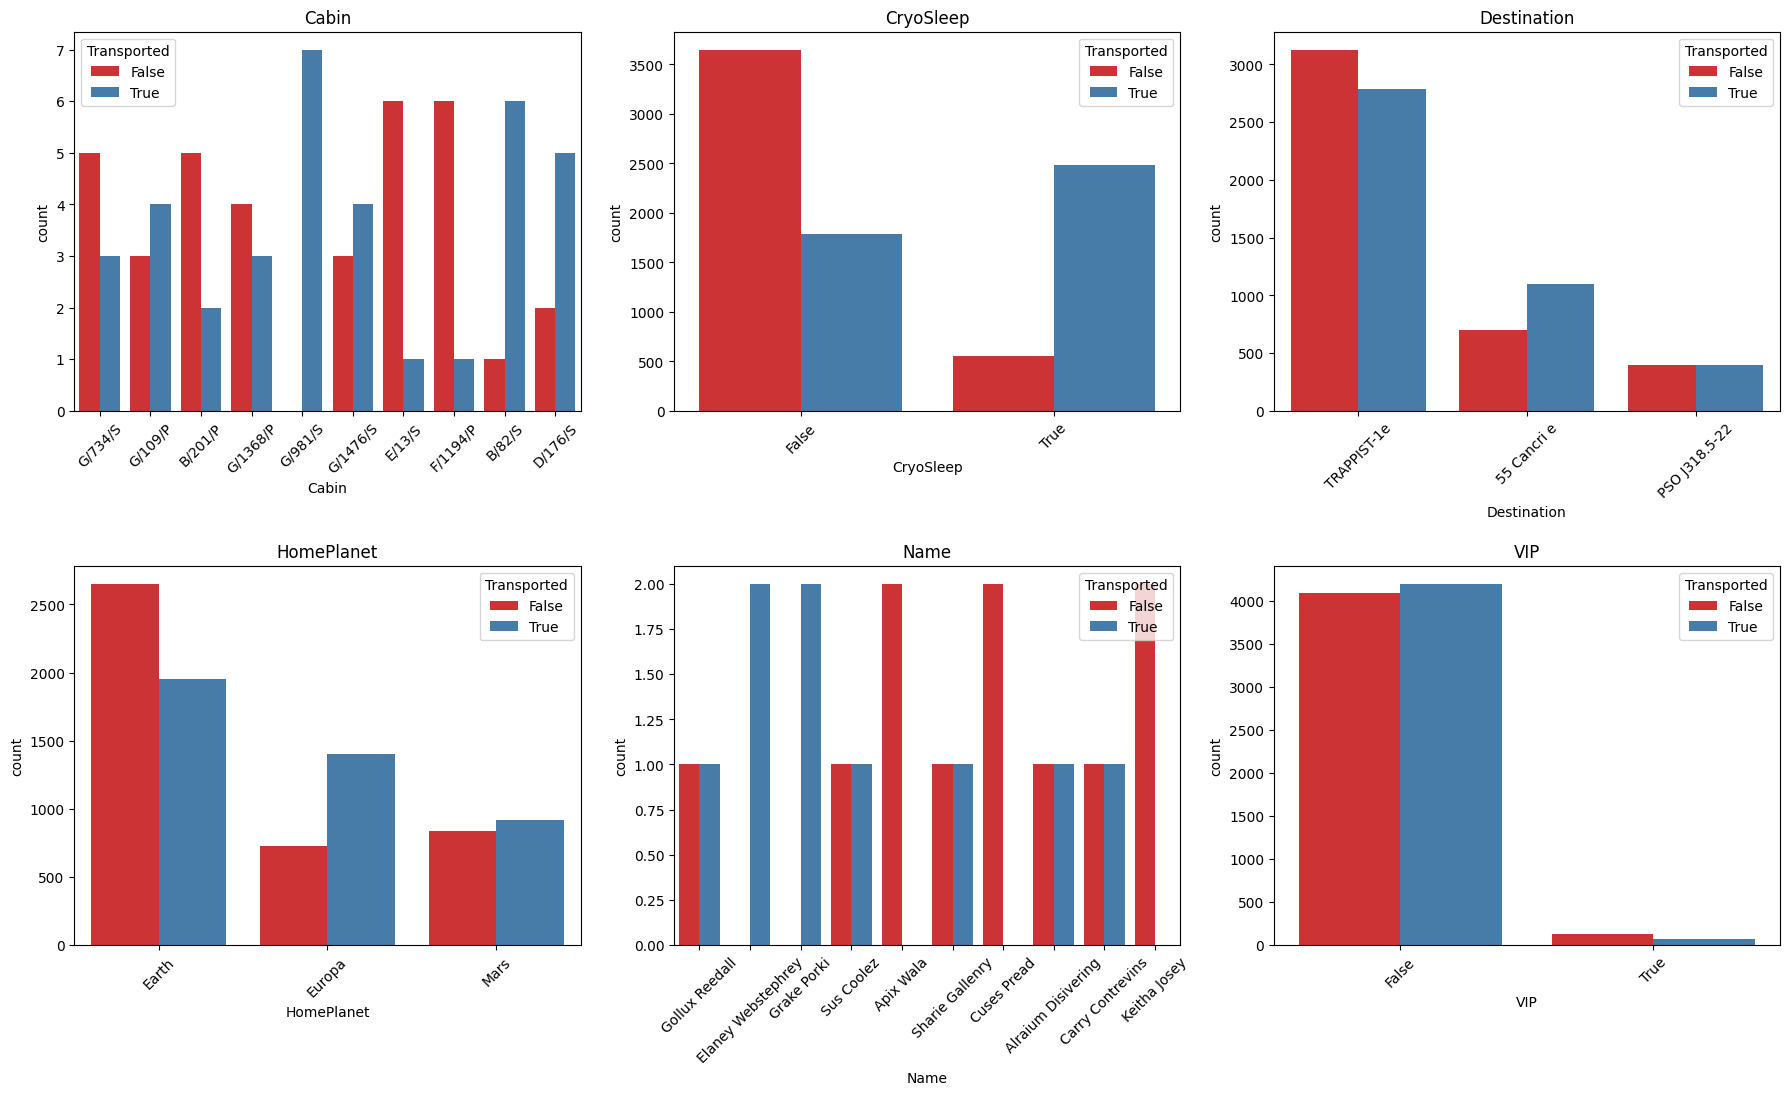

In [132]:
color_palette = sns.color_palette("Set1", len(obj_cols))

n_cols = 3
n_rows = (len(obj_cols) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(obj_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    top_10_items = df[column].value_counts().nlargest(10).index
    
    filtered_df = df[df[column].isin(top_10_items)]
    
    sns.countplot(data=filtered_df, x=column, palette=color_palette, order=top_10_items, hue='Transported')
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

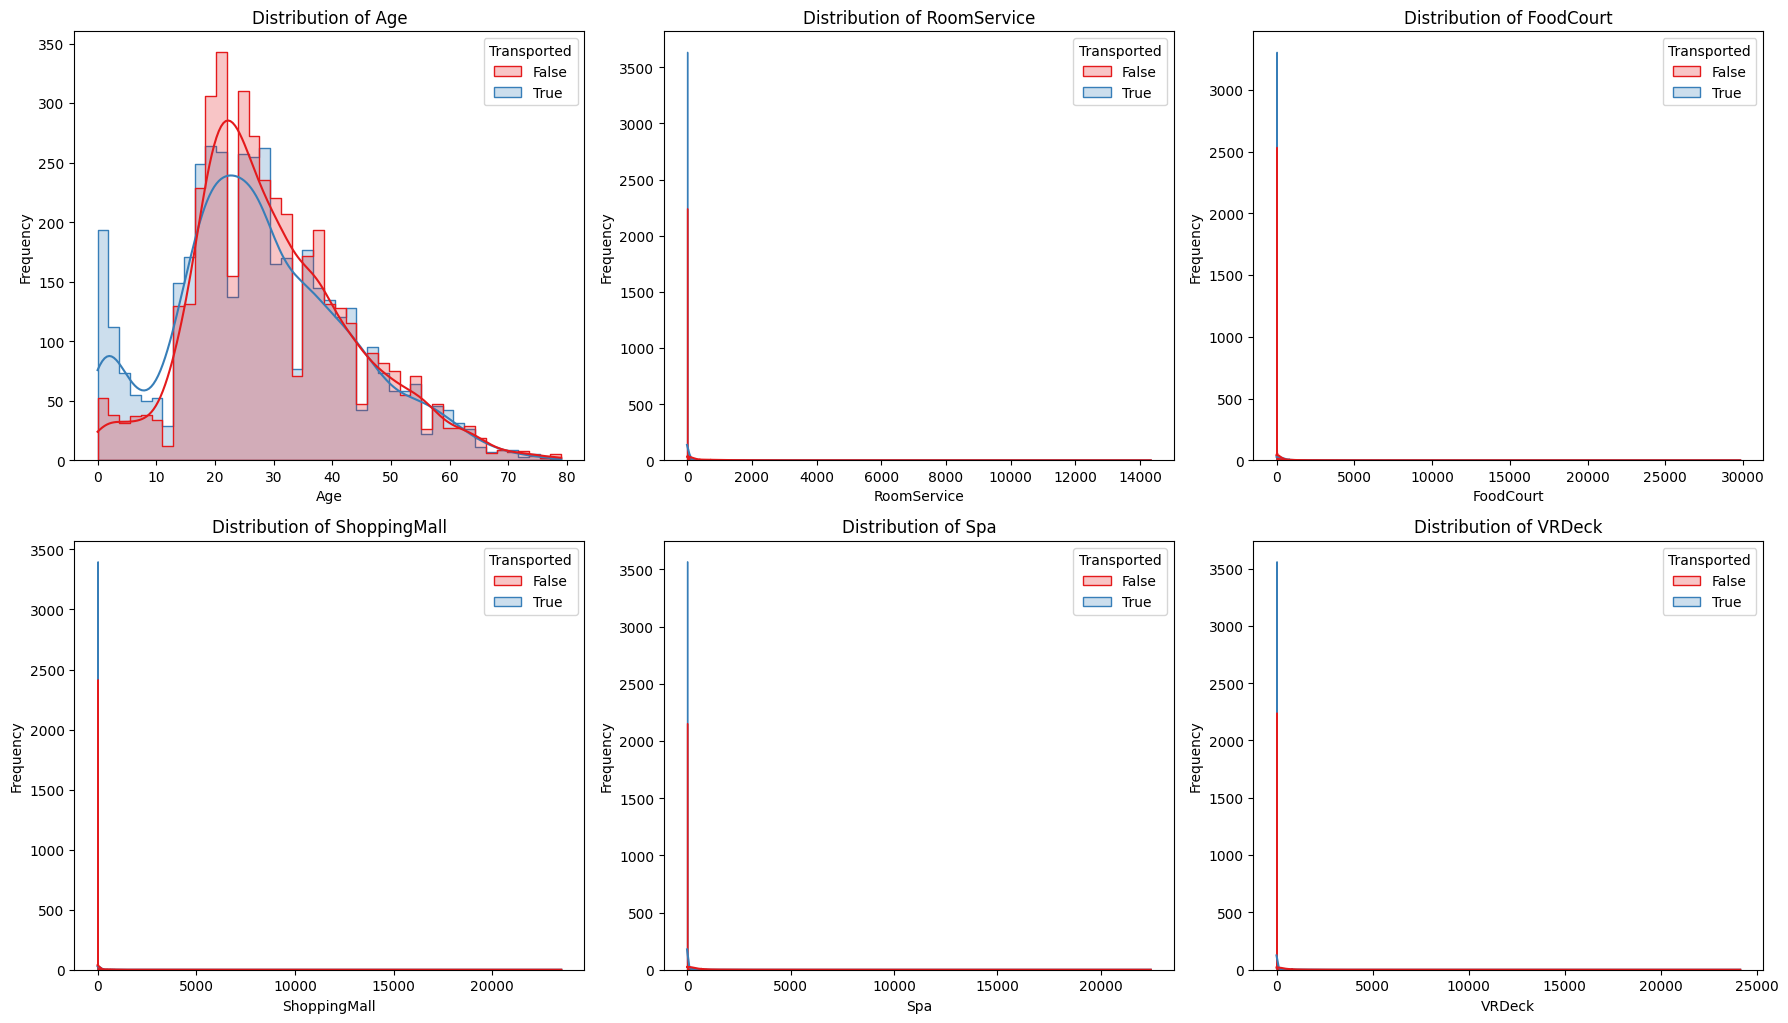

In [133]:
n_cols = 3
n_rows = (len(num_cols) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.histplot(data=df, x=column, hue='Transported', kde=True, palette='Set1', element='step')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

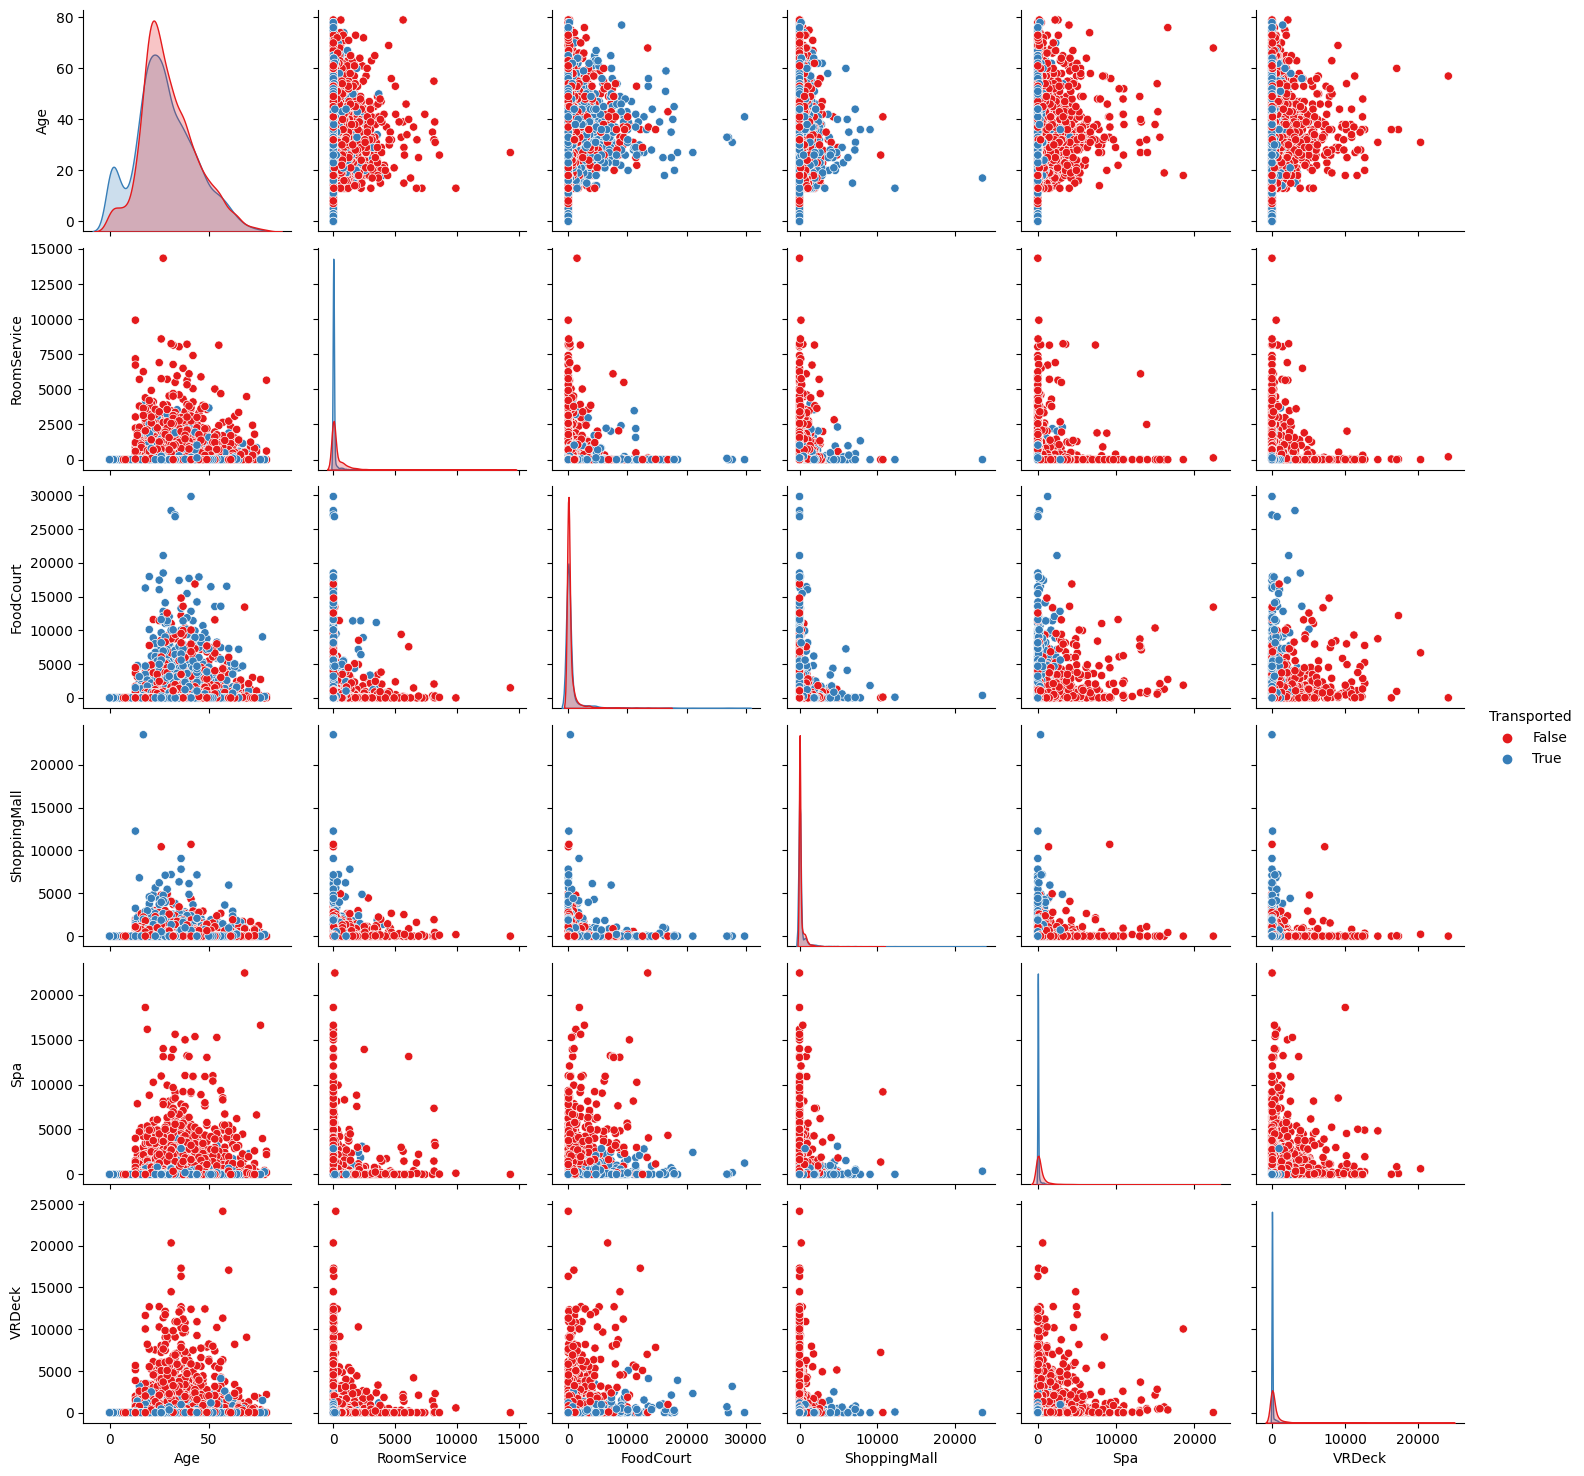

In [134]:
combined_df = pd.concat([df[num_cols], df['Transported']], axis=1)
sns.pairplot(combined_df, hue='Transported', palette='Set1')
plt.show()

In [135]:
def feature_engineer(df):
    df = df.copy()
    
    for col in obj_cols:
        if col == 'Cabin':
            df[col] = df[col].fillna('unknown/0/unknown')
        else:
            df[col] = df[col].fillna('unknown')
    
    for col in num_cols:
        if col == 'Age':
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
        
    df['Cabin_deck'] = df['Cabin'].apply(lambda x: x.split('/')[0])
    df['Cabin_number'] = df['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
    df['Cabin_side'] = df['Cabin'].apply(lambda x: x.split('/')[2])
    
    df = df.drop(['Cabin', 'Name'], axis=1)
    
    return df

df = feature_engineer(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Cabin_deck    8693 non-null   object 
 13  Cabin_number  8693 non-null   int64  
 14  Cabin_side    8693 non-null   object 
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 959.4+ KB


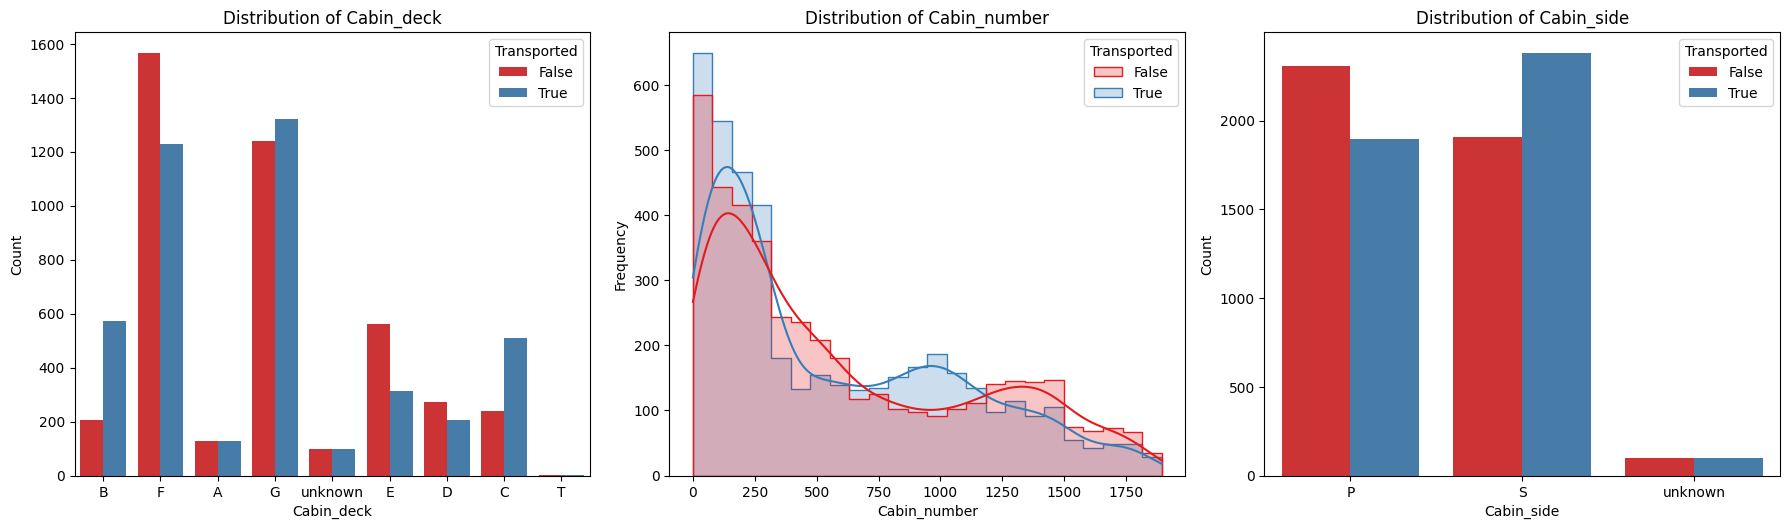

In [136]:
new_cols = ['Cabin_deck', 'Cabin_number', 'Cabin_side']

n_cols = 3
n_rows = (len(num_cols) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))

for i, column in enumerate(new_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    if column in ['Cabin_deck', 'Cabin_side']:
        sns.countplot(data=df, x=column, hue='Transported', palette='Set1')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        
    elif column in ['Cabin_number']:
        sns.histplot(data=df, x=column, hue='Transported', kde=True, palette='Set1', element='step')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [137]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import optuna

In [138]:
train = df.copy()

X = train.drop(['PassengerId', 'Transported'], axis=1)
y = train['Transported']

random_state = 42
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

In [139]:
label_encoders = {}

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=random_state)

In [141]:
classifiers = []
classifiers.append(KNeighborsClassifier(n_neighbors=5))
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='error'))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring="accuracy", cv=kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({
    "CrossValMeans": cv_means,
    "CrossValerrors": cv_std,
    "Algorithm": ["KNN", "GaussianNB", "Decision Tree", "Random Forest", "XGBoost"]
})

cv_res.sort_values(by='CrossValMeans', ascending=False)

,CrossValMeans,CrossValerrors,Algorithm
3,0.797672,0.005307,Random Forest
4,0.795225,0.005662,XGBoost
0,0.755107,0.015439,KNN
2,0.741730,0.009731,Decision Tree
1,0.702906,0.009577,GaussianNB


In [142]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=random_state
    )
    
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

In [143]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-09-26 13:06:22,262] A new study created in memory with name: no-name-b5fc98ed-8abd-444d-b77e-0822d7055b46
[I 2024-09-26 13:06:24,212] Trial 0 finished with value: 0.7759580861550874 and parameters: {'n_estimators': 69, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 12, 'max_features': 'log2'}. Best is trial 0 with value: 0.7759580861550874.
[I 2024-09-26 13:06:25,928] Trial 1 finished with value: 0.7962337534717014 and parameters: {'n_estimators': 52, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 20, 'max_features': 'auto'}. Best is trial 1 with value: 0.7962337534717014.
[I 2024-09-26 13:06:29,362] Trial 2 finished with value: 0.7986788656781261 and parameters: {'n_estimators': 96, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 0.7986788656781261.
[I 2024-09-26 13:06:38,580] Trial 3 finished with value: 0.7995419681508567 and parameters: {'n_estimators': 216, 'max_depth': 17, 'm

In [144]:
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 220, 'max_depth': 12, 'min_samples_split': 13, 'min_samples_leaf': 12, 'max_features': 'auto'}


In [145]:
clf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=random_state,
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

score = accuracy_score(y_test, y_pred)
print('Val Accuracy:', score)

Val Accuracy: 0.8004600345025877


In [146]:
test = pd.read_csv('./spaceship-titanic/test.csv')
test_df = feature_engineer(test).drop('PassengerId', axis=1)

for col, le in label_encoders.items():
    test_df[col] = le.transform(test_df[col].astype(str))

In [147]:
pred = clf.predict(test_df)
pred

array([ True, False,  True, ...,  True,  True,  True])

In [148]:
submissions = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': pred})
submissions.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [149]:
submissions.to_csv('submission.csv', index=False)